In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
import sys
sys.path.append('../')
from src import utils 
from src.UNet import *
from src.datatools import *

## Scenario 2

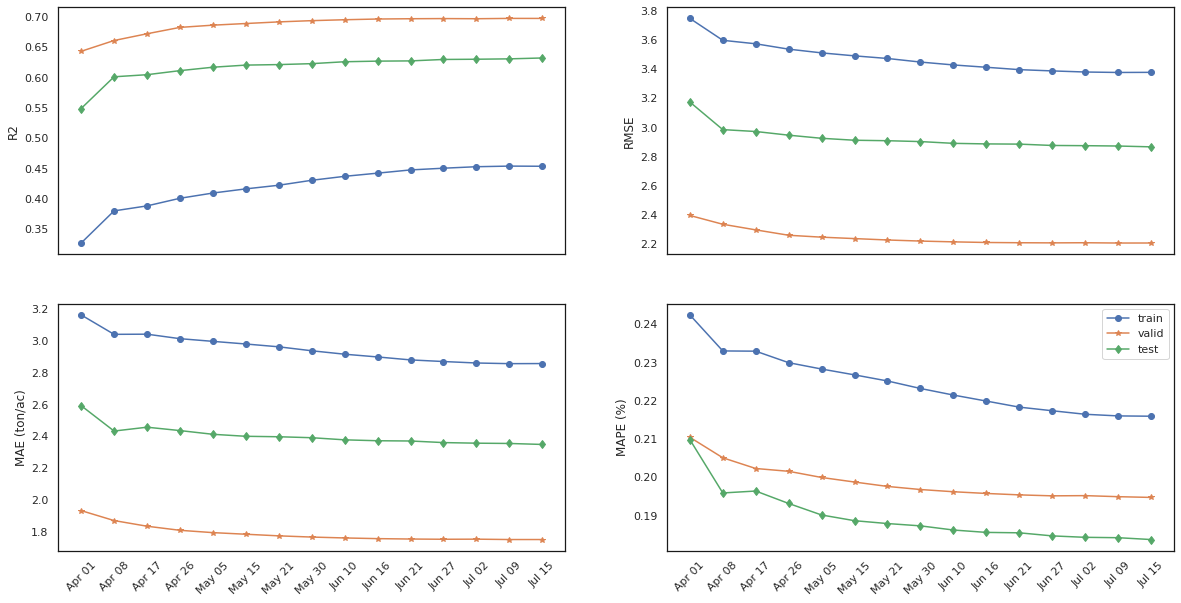

In [5]:
train_df_1819 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16171m/S2_UNetLSTMY16171m_train.csv', index_col=0)
valid_df_16_1 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16171m/S2_UNetLSTMY16171m_valid.csv', index_col=0) 
test_df_17    = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16171m/S2_UNetLSTMY16171m_test.csv', index_col=0) 
R_Y1617       = utils.time_series_2d_eval(train_df_1819, valid_df_16_1, test_df_17, 'test', save = False)

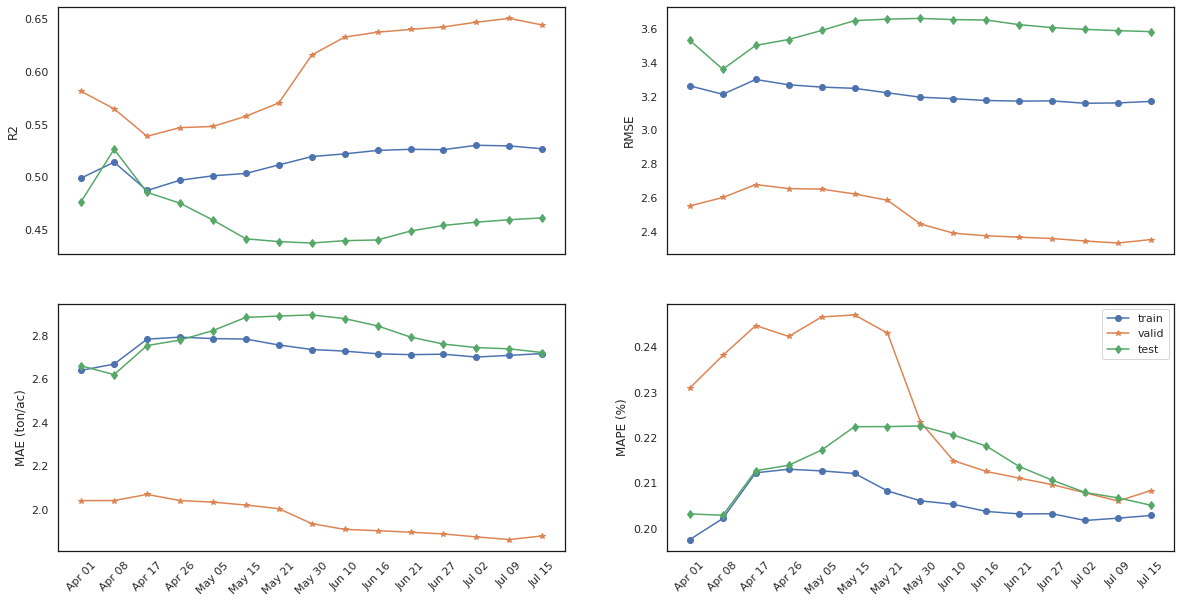

In [6]:
train_df_1719 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16181m/S2_UNetLSTMY16181m_train.csv', index_col=0)
valid_df_16_2 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16181m/S2_UNetLSTMY16181m_valid.csv', index_col=0) 
test_df_18_1  = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16181m/S2_UNetLSTMY16181m_test.csv', index_col=0) 
R_Y1618       = utils.time_series_2d_eval(train_df_1719, valid_df_16_2, test_df_18_1, 'test', save = False)

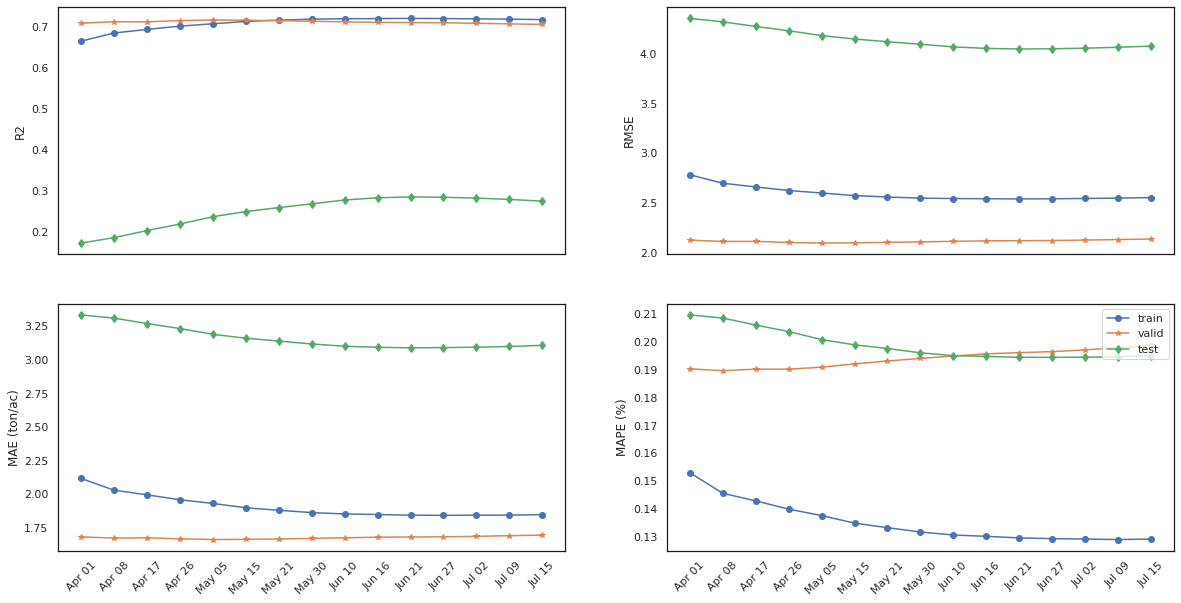

In [7]:
train_df_1718 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16191m/S2_UNetLSTMY16191m_train.csv', index_col=0)
valid_df_16_3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16191m/S2_UNetLSTMY16191m_valid.csv', index_col=0) 
test_df_19_1  = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY16191m/S2_UNetLSTMY16191m_test.csv', index_col=0) 
R_Y1619       = utils.time_series_2d_eval(train_df_1718, valid_df_16_3, test_df_19_1, 'test', save = False)

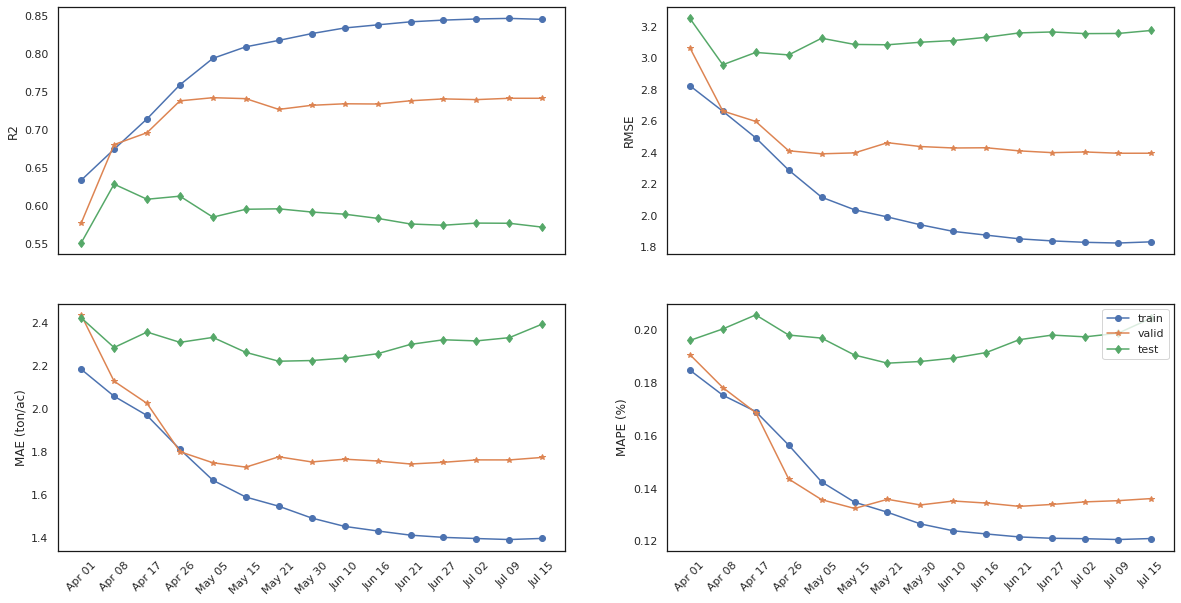

In [8]:
train_df_1619 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_train.csv', index_col=0)
valid_df_17_1 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_valid.csv', index_col=0) 
test_df_18_2  = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_test.csv', index_col=0) 
R_Y1718       = utils.time_series_2d_eval(train_df_1619, valid_df_17_1, test_df_18_2, 'test', save = False)

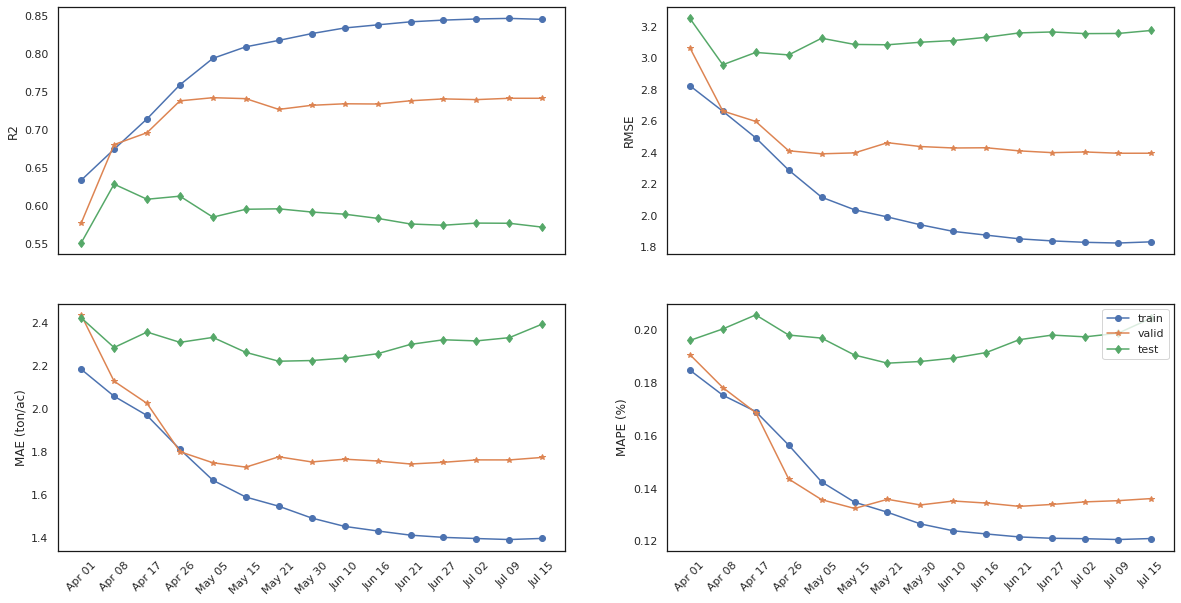

In [9]:
train_df_1618 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_train.csv', index_col=0)
valid_df_17_2 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_valid.csv', index_col=0) 
test_df_19_1  = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY17181m/S2_UNetLSTMY17181m_test.csv', index_col=0) 
R_Y1719       = utils.time_series_2d_eval(train_df_1618, valid_df_17_2, test_df_19_1, 'test', save = False)

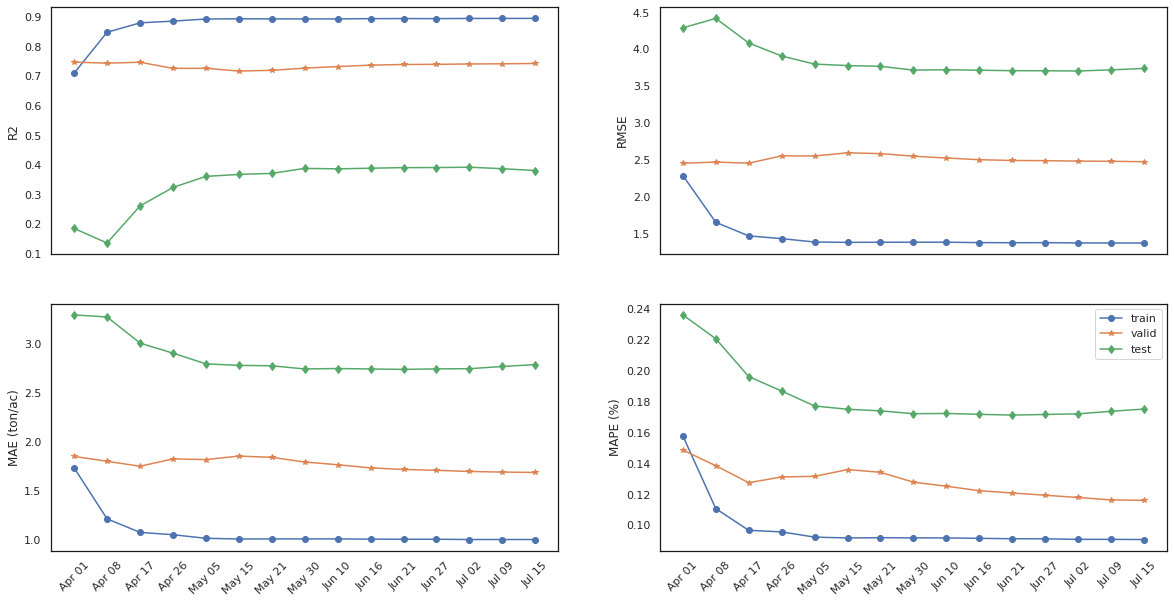

In [10]:
train_df_1617 = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY18191m/S2_UNetLSTMY18191m_train.csv', index_col=0)
valid_df_18   = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY18191m/S2_UNetLSTMY18191m_valid.csv', index_col=0) 
test_df_19_3  = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S2_UNetLSTMY18191m/S2_UNetLSTMY18191m_test.csv', index_col=0) 
R_Y1819       = utils.time_series_2d_eval(train_df_1617, valid_df_18, test_df_19_3, 'test', save = False)

In [18]:
list_of_exps = [R_Y1617, R_Y1618, R_Y1718, R_Y1619, R_Y1719, R_Y1819]
tr_r2, val_r2, test_r2 = [], [], []
tr_mae, val_mae, test_mae = [], [], [] 
tr_rmse, val_rmse, test_rmse = [], [] , [] 
tr_mape, val_mape, test_mape = [], [], []

for d in list_of_exps: 
    tr_r2.append(d.iloc[14]['Train_R2'])
    val_r2.append(d.iloc[14]['Valid_R2'])
    test_r2.append(d.iloc[14]['Test_R2'])

    tr_mae.append(d.iloc[14]['Train_MAE'])
    val_mae.append(d.iloc[14]['Valid_MAE'])
    test_mae.append(d.iloc[14]['Test_MAE'])

    tr_rmse.append(d.iloc[14]['Train_RMSE'])
    val_rmse.append(d.iloc[14]['Valid_RMSE'])
    test_rmse.append(d.iloc[14]['Test_RMSE'])

    tr_mape.append(d.iloc[14]['Train_MAPE'])
    val_mape.append(d.iloc[14]['Valid_MAPE'])
    test_mape.append(d.iloc[14]['Test_MAPE'])


print(f"Train: {np.mean(tr_r2)}, {np.std(tr_r2)}| {np.mean(tr_mae)}, {np.std(tr_mae)} | {np.mean(tr_rmse)}, {np.std(tr_rmse)}| {np.mean(tr_mape)}, {np.std(tr_mape)}")  
print(f"Valid: {np.mean(val_r2)}, {np.std(val_r2)}| {np.mean(val_mae)}, {np.std(val_mae)} | {np.mean(val_rmse)}, {np.std(val_rmse)}| {np.mean(val_mape)}, {np.std(val_mape)}")  
print(f"Test:  {np.mean(test_r2)}, {np.std(test_r2)}| {np.mean(test_mae)}, {np.std(test_mae)} | {np.mean(test_rmse)}, {np.std(test_rmse)}| {np.mean(test_mape)}, {np.std(test_mape)}")   




Train: 0.7146904253287274, 0.16876419802439152| 1.8708054915782484, 0.6944528120391731 | 2.357283463455444, 0.7377435054109244| 0.14684158040191708, 0.04600819759322202
Valid: 0.7128980191742326, 0.03569780009706156| 1.761511681640697, 0.0636428843446844 | 2.3274033642117846, 0.11740240789637844| 0.1650761881555787, 0.03639797917446334
Test:  0.4827603923928106, 0.12381877291307786| 2.627148846193268, 0.27474576203801704 | 3.4375105341437955, 0.40566417009180655| 0.19471477793212463, 0.011506482709052737


: 

In [13]:
df2016 = utils.concat_year_s2(R_Y1617, R_Y1617, R_Y1617) 
df2017 = utils.concat_year_s2(R_Y1617, R_Y1617, R_Y1617) 
df2018 = utils.concat_year_s2(R_Y1618, R_Y1718, R_Y1718)
df2019 = utils.concat_year_s2(R_Y1619, R_Y1719, R_Y1819)
S2_all = utils.S2_mean_eval(df2016, df2017, df2018, df2019)

In [14]:
S2_all

,weeks,Train_MAE_M,Train_MAE_S,Valid_MAE_M,Valid_MAE_S,Test_MAE_M,Test_MAE_S,Train_MAPE_M,Train_MAPE_S,Valid_MAPE_M,Valid_MAPE_S,Test_MAPE_M,Test_MAPE_S
0,Apr 01,2.668648,0.506583,2.040801,0.155095,2.676979,0.201320,0.209810,0.033675,0.200401,0.013968,0.208045,0.005795
1,Apr 08,2.527812,0.541360,1.927657,0.100137,2.555578,0.233289,0.198565,0.037276,0.194302,0.014958,0.200752,0.005771
2,Apr 17,2.501076,0.575286,1.882392,0.092246,2.571068,0.179101,0.196428,0.040153,0.190202,0.016509,0.200898,0.004899
3,Apr 26,2.443448,0.599664,1.816869,0.041911,2.538939,0.161381,0.191478,0.041559,0.183670,0.019410,0.196489,0.004199
4,May 05,2.393188,0.628531,1.795012,0.035719,2.523914,0.148722,0.186659,0.044149,0.181353,0.019856,0.193924,0.005709
5,May 15,2.361968,0.641242,1.786910,0.027488,2.501595,0.138624,0.183661,0.045351,0.180429,0.019272,0.191673,0.005495
6,May 21,2.338726,0.644962,1.791590,0.036625,2.488288,0.131993,0.181467,0.045702,0.180324,0.018291,0.190337,0.005119
7,May 30,2.309438,0.647527,1.772477,0.027133,2.482007,0.126609,0.179063,0.045959,0.177301,0.019909,0.189923,0.005641
8,Jun 10,2.287470,0.646825,1.768716,0.028671,2.475707,0.131209,0.177392,0.045839,0.176529,0.019979,0.189459,0.005976
9,Jun 16,2.271950,0.644396,1.761651,0.029614,2.474145,0.134425,0.176118,0.045489,0.175730,0.020303,0.189404,0.006351


In [ ]:
_ = utils.time_series_2d_eval_S2(df2016, df2017, df2018, df2019)

## scenario 3

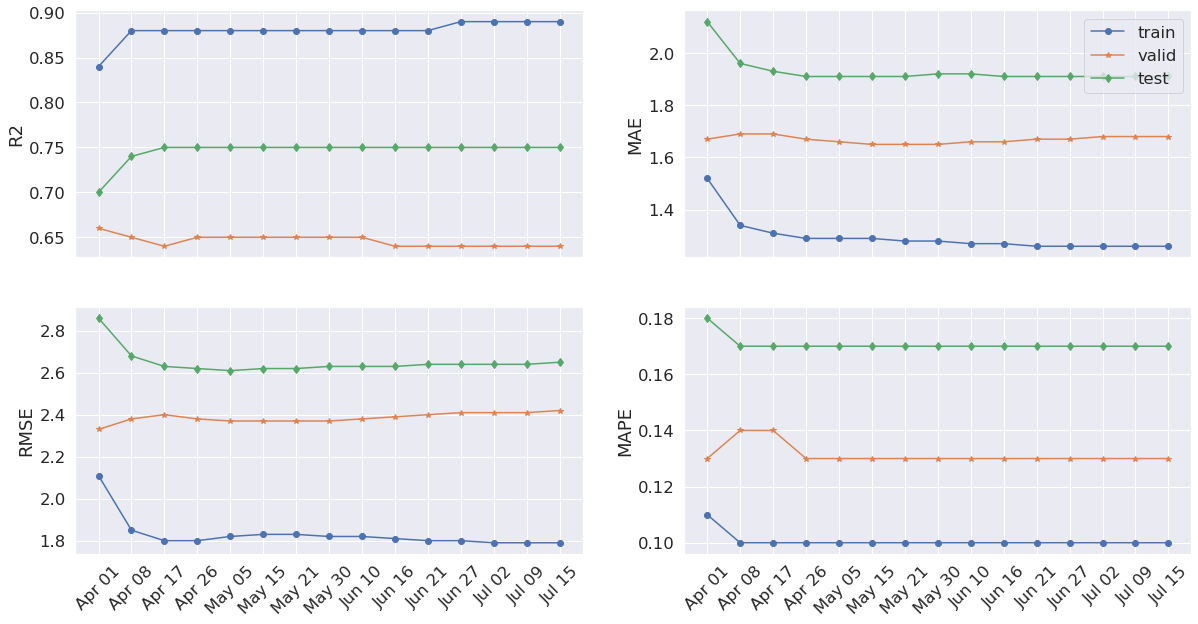

In [4]:
S3_train_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_1m/S3_UNetLSTM_1m_train.csv', index_col=0)
S3_valid_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_1m/S3_UNetLSTM_1m_valid.csv', index_col=0) 
S3_test_df  = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_1m/S3_UNetLSTM_1m_test.csv', index_col=0) 

S3_fig_save_name = '/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_1m/S3_timeseries_1m.png'
_ = utils.time_series_2d_eval(S3_train_df, S3_valid_df, S3_test_df, S3_fig_save_name, save = False)

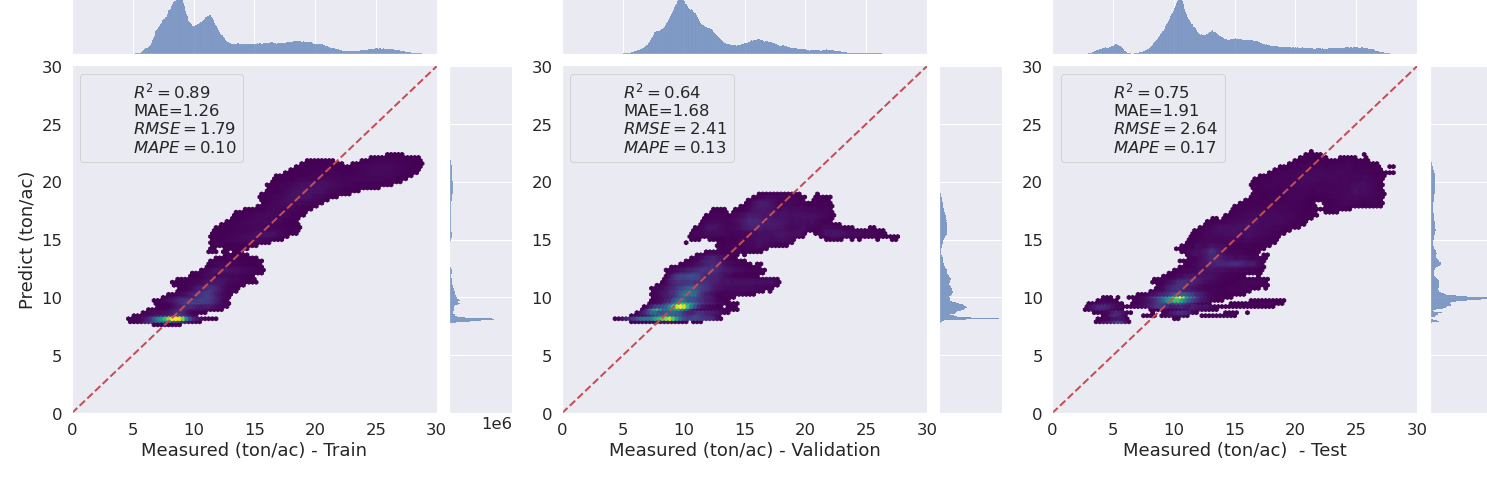

In [43]:
_ = utils.train_val_test_satterplot(S3_train_df, S3_valid_df, S3_test_df, cmap  = 'viridis', mincnt = 4000)

In [ ]:
S3_blocks, S3_cultivars = utils.block_cultivar_level_csv(exp_name = 'S3_UNetLSTM_1m', spatial_resolution = 1, 
                                                        week = 'ypred_w15', save_csv_name = '/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_1m/S3_BC')

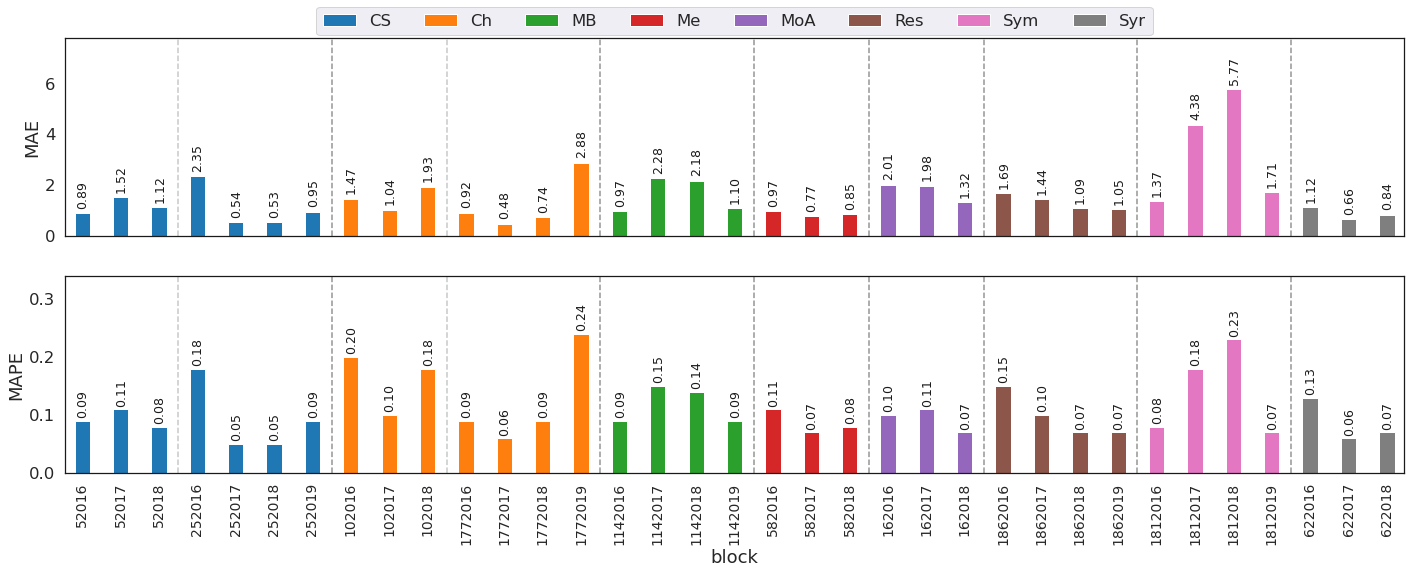

In [134]:
cultivar_list = ['MALVASIA_BIANCA', 'MUSCAT_OF_ALEXANDRIA', 'CABERNET_SAUVIGNON','SYMPHONY', 'MERLOT', 'CHARDONNAY', 'SYRAH', 'RIESLING']
s3_block_list = [52016, 52017, 52018, 252016, 252017, 252018, 252019, 102016, 102017, 102018, 1772016, 1772017, 1772018, 1772019, 
                1142016, 1142017,1142018,1142019, 582016, 582017, 582018, 162016, 162017, 162018, 1862016, 1862017,1862018, 1862019, 
                1812016, 1812017,1812018,1812019, 622016, 622017, 622018]

                
_ = utils.block_eval_barplot(S3_blocks, cultivar_list = cultivar_list, block_list = s3_block_list)

In [ ]:
exp_name = 'EXP_S3_UNetLSTM_1m'
input_data   = np.load(os.path.join('/data2/hkaman/Livingston/EXPs/1m/', exp_name, 'S3_UNetLSTM_1m_test_vis_bc1.csv'))
block_names  = utils.npy_block_names(input_data)
BC_df, BC_agg_df   = utils.time_series_eval_csv(input_data, block_names, 80)

In [5]:
s3_block_list = [52016, 52017, 52018, 252016, 252017, 252018, 252019, 102016, 102017, 102018, 1772016, 1772017, 1772018, 1772019, 
                1142016, 1142017,1142018,1142019, 582016, 582017, 582018, 162016, 162017, 162018, 1862016, 1862017,1862018, 1862019, 
                1812016, 1812017,1812018,1812019, 622016, 622017, 622018]
BC_agg_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/1m/EXP_S3_UNetLSTM_1m/S3_UNetLSTM_1m_test_vis_bc1.csv')
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(BC_agg_df, s3_block_list[25], aggregation = False, stial_resolution = 1)

(6988800, 21)


In [1]:
this_block_df

NameError: name 'this_block_df' is not defined

In [ ]:
_= utils.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

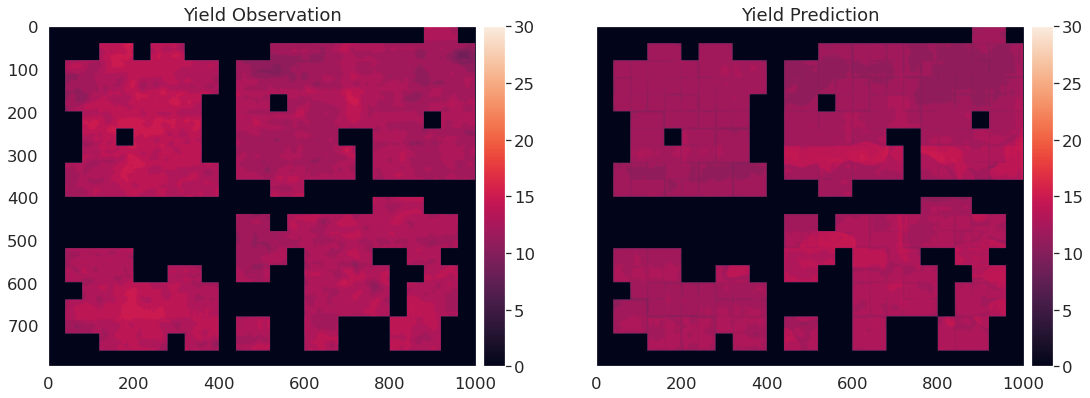

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams["axes.grid"] = False
fig, axs = plt.subplots(1, 2, figsize = (18, 9))

img1 = axs[0].imshow(ytrue)
axs[0].set_title('Yield Observation')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar1 = fig.colorbar(img1,  cax=cax)
img1.set_clim(0, 30)

img2 = axs[1].imshow(ypred)
axs[1].set_title('Yield Prediction')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar2 =fig.colorbar(img2, cax=cax)
img2.set_clim(0, 30)
axs[1].get_yaxis().set_visible(False)

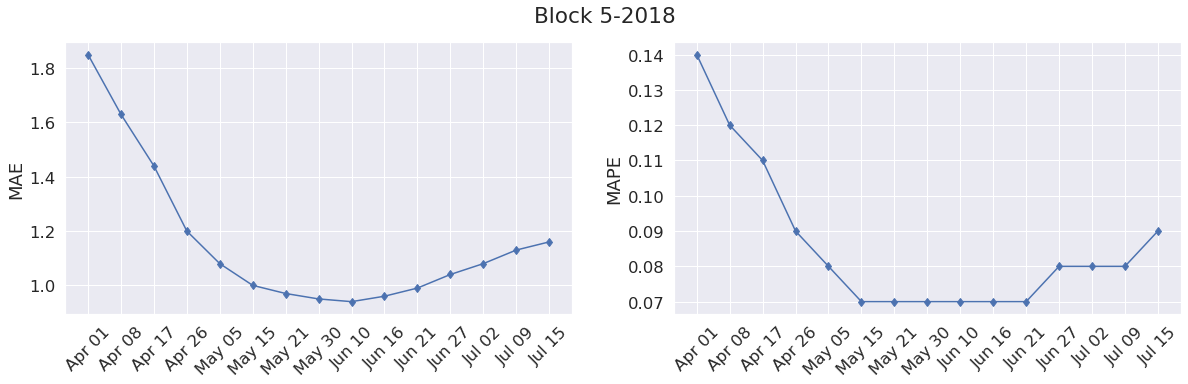

In [47]:
_ = utils.time_series_block_eval(this_block_df, block_id = 'Block 5-2018')

## Scenario 4

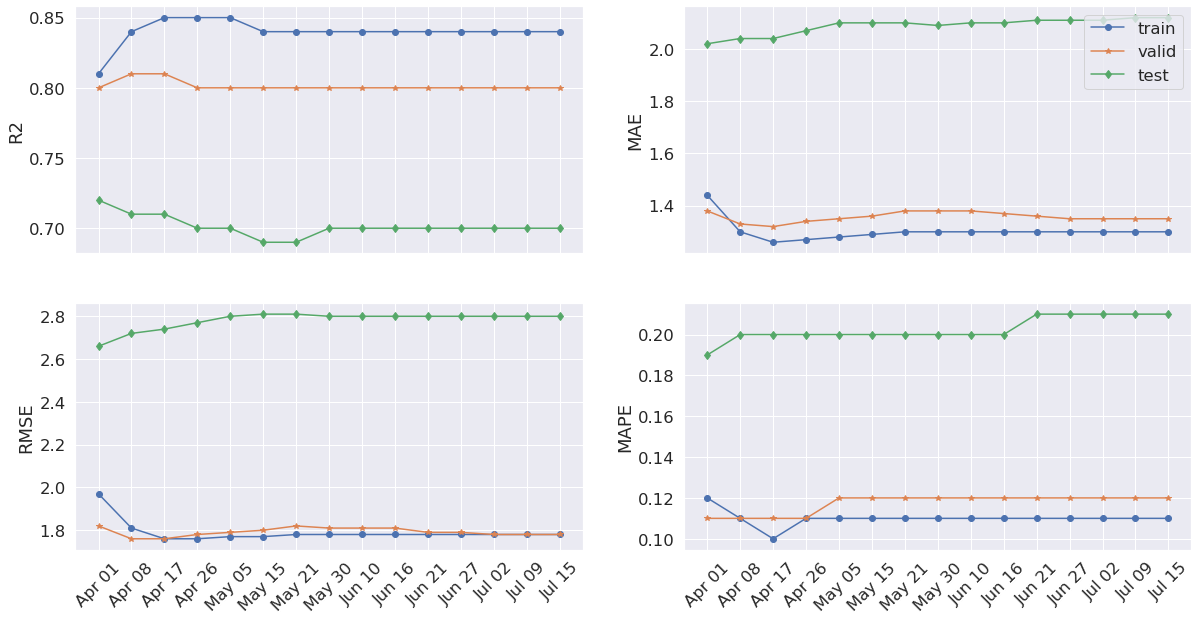

In [4]:
S4_train_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_UNetLSTM_1m_train.csv', index_col=0)
S4_valid_df = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_UNetLSTM_1m_valid.csv', index_col=0) 
S4_test_df  = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_UNetLSTM_1m_test.csv', index_col=0) 

S4_fig_save_name = '/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_timeseries_1m.png'
_ = utils.time_series_2d_eval(S4_train_df, S4_valid_df, S4_test_df, S4_fig_save_name, save = False)

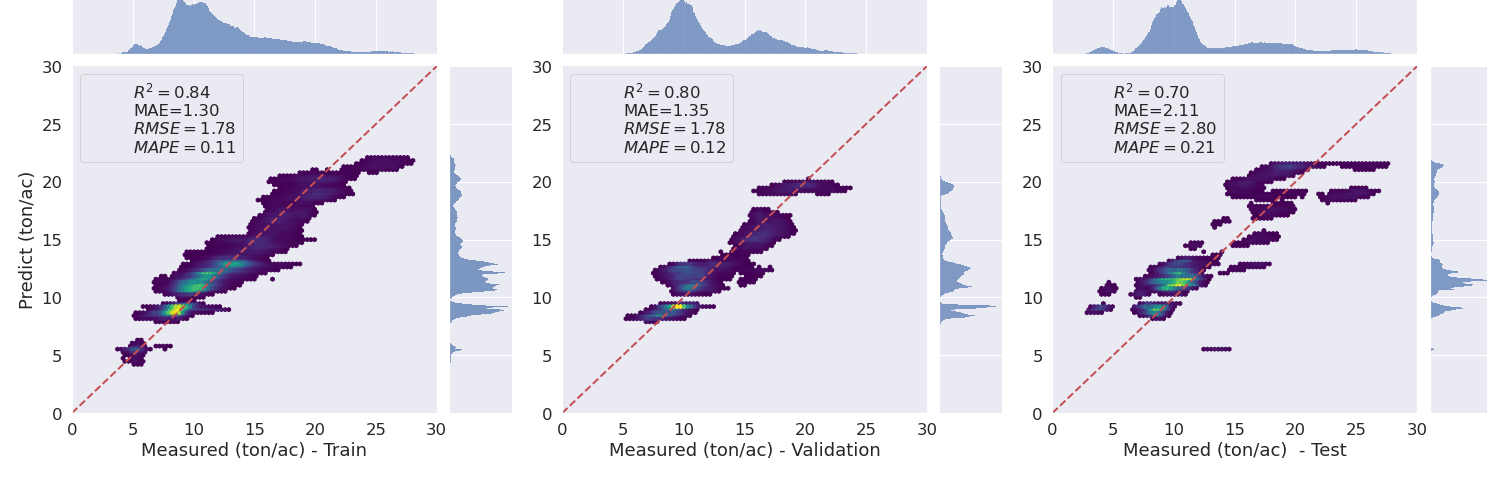

In [8]:
_ = utils.train_val_test_satterplot(S4_train_df, S4_valid_df, S4_test_df, week = 15, cmap  = 'viridis', mincnt = 8000)

In [6]:
S4_blocks, S4_cultivars = utils.block_cultivar_level_csv(exp_name = 'S4_UNetLSTM_1m', spatial_resolution = 1, week = 'ypred_w15', 
                                                            save_csv_name = '/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_BC')

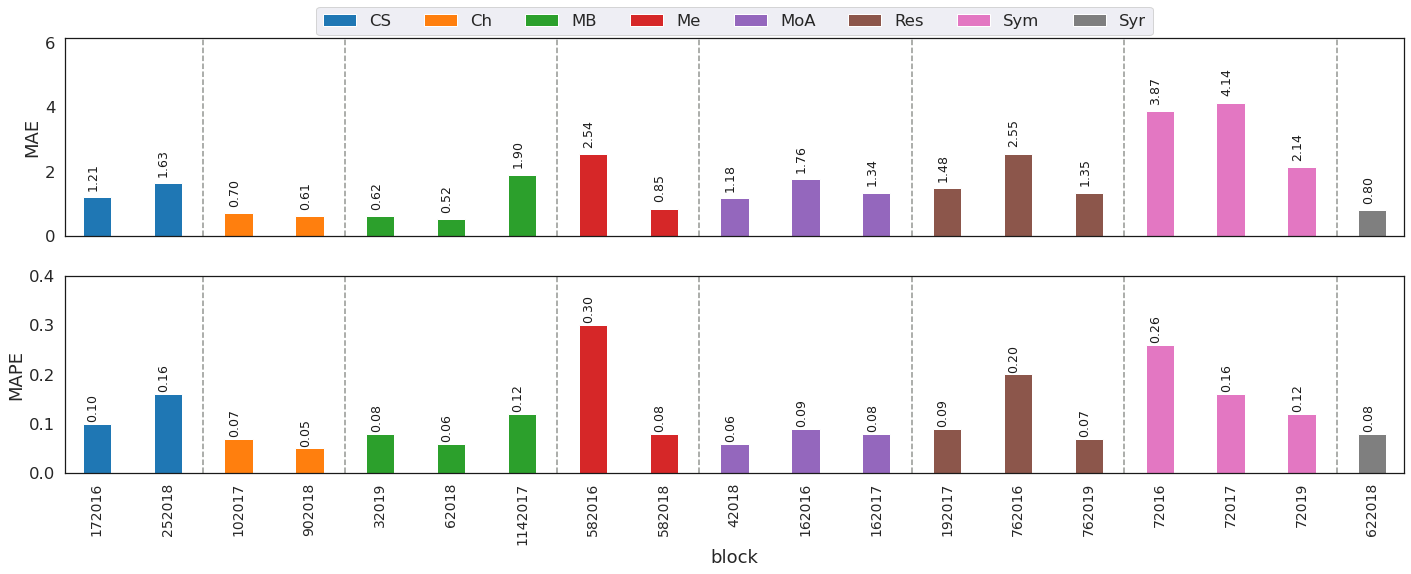

In [14]:
cultivar_list = ['MALVASIA_BIANCA', 'MUSCAT_OF_ALEXANDRIA', 'CABERNET_SAUVIGNON','SYMPHONY', 'MERLOT', 'CHARDONNAY', 'SYRAH', 'RIESLING']
s4_block_list = [172016, 252018, 102017, 902018, 32019, 62018, 1142017, 582016, 582018, 42018, 162016, 162017, 762016, 762019, 
                192017, 72016, 72017, 72019, 622018]
S4_blocks = pd.read_csv('/data2/hkaman/Livingston/EXPs/EXP_S4_UNetLSTM_1m/S4_BC_blocks.csv')          
_ = utils.block_eval_barplot_S4(S4_blocks, cultivar_list = cultivar_list, block_list = s4_block_list)